<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/%EB%A7%A4%EC%9D%BC_%EC%A1%B0%EA%B8%88%EC%94%A9_2%2C3%EC%9D%BC%EC%B0%A8_%EB%AC%B8%EC%A0%9C_7~10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


## Step 3. 모델 학습을 위한 데이터 전처리


2일차

### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time']]
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
y = df[['DEATH_EVENT']]


In [ ]:
print(df.index)

RangeIndex(start=0, stop=299, step=1)


In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
# transform을 통해서 scaled 하게 되면 numpy로 바뀌게 되므로 DataFrame으로 바꿔줘야 한다
X_scaled = pd.DataFrame(data=X_scaled,index=X_num.index, columns=X_num.columns)  
# index : 행 이름 설정 columns : 열 이름 설정
X = pd.concat([X_scaled, X_cat], axis=1)
# 수치형 데이터 이후에 concat을 사용해 범주형 데이터를 붙혀주었다
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-1.577879,1,1,0,0,0


3일차

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
# X = 전처리된 전체 데이터 y = 출력 데이터(DEATH_EVENT)
# test_size : 테스트 데이터 비율 
# stratify : Stratified sampling 무작위로 샘플링을 하는데 기존 데이터셋에서 클래스 비율을 동일하게 유지하면서 분리하는 것 대충 0과 1을 동일한 비율로 train/testset으로 분리해준다는 것 같다.
# random_state random함수의 시드값을 고정시켜준다.그래서 shuffle과 같이 사용해서 섞어도 같은 값이 나온다.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1, shuffle=True)  

In [ ]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time,anaemia,diabetes,high_blood_pressure,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,-1.526256,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,0.745172,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,1.016195,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,-1.255233,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,-0.054990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,0.732266,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.106535,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-0.751905,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,1.016195,1,0,1,1,0


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, 
#                    solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
# penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2
# dual : 이중 또는 초기 공식
# tol : 정밀도
# C : 규제 강도
# fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
# intercept_scaling : 정규화 효과 정도
# class_weight : 클래스의 가중치
# random_state : 난수 seed 설정
# solver : 최적화 문제에 사용하는 알고리즘
# max_iter : 계산에 사용할 작업 수
# multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
# verbose : 동작 과정에 대한 출력 메시지 verbose=1,2 2로 해주면 1보다 조금 더 많이 보여줌
# warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
# n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
# l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용
# https://inuplace.tistory.com/522

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(C=3, max_iter=1000)
model_lr.fit(X_train, y_train)

model_lr.score(X_train, y_train), model_lr.score(X_test, y_test)
#학습 데이터가 테스트 데이터보다 정확도가 높다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.8277511961722488, 0.8222222222222222)

### 문제 10. 모델 학습 결과 평가하기


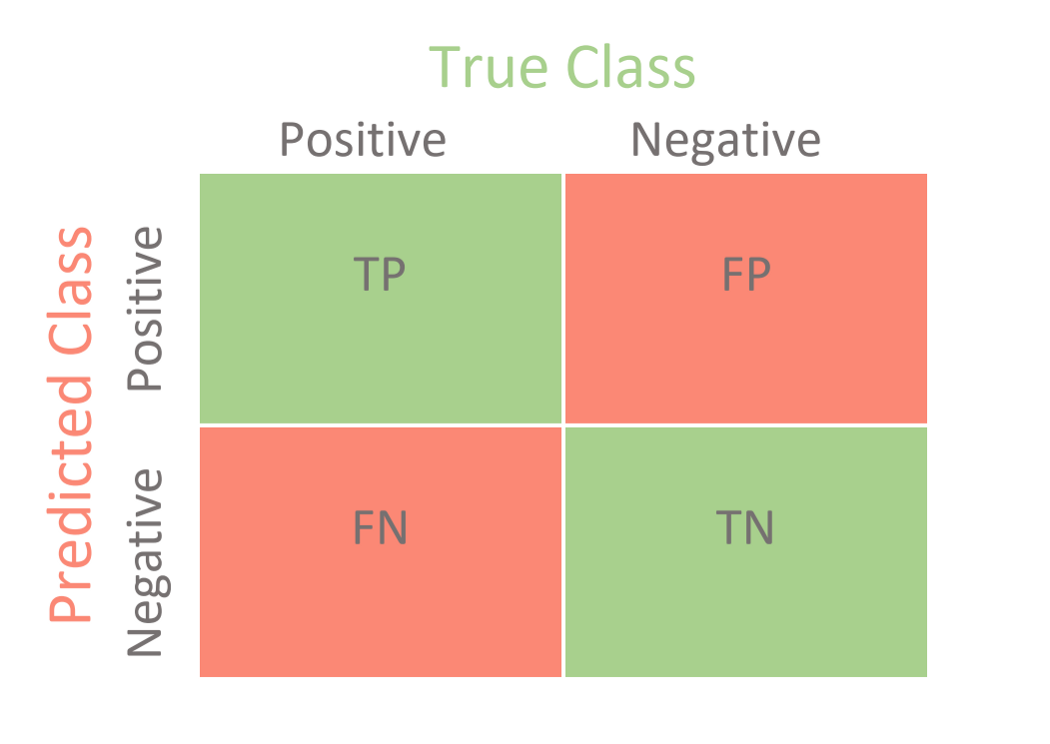

Confusion Matrix

In [ ]:
# classification_report
# precision 정밀도 : 양성 클래스라고 예측한 샘플 중 실제 양성 클레스에 속하는 샘플 
# precision=TP/(TP+FP)
# recall 재현율 : 양성 클레스에 속한 샘플 중 양성 클래스라고 예측한 샘플
# recall=TP/(TP+FN)
# accuracy 정확도 전체 샘플 중 맞게 예측한 샘플 수의 비율
# (TP+TN)/(TN+TP+FN+FP)
# f1-score precision,recall의 가중 조화평균
# 가중치가 1일떄 F1임 
# support:샘플 개수
#https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
# 학습된 테스트 데이터를 predict() 메서드로 예측
pred = model_lr.predict(X_test)
# def classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report(y_test, pred))
# 90개의 데이터를 평가했을 때 82퍼센트의 정확도를 가지고 있음

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.71      0.65      0.68        26

    accuracy                           0.82        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90

